<a href="https://colab.research.google.com/github/jasantos1976/pucrioMVP2/blob/main/mvp2_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do Problema

O dataset utilizado nesse MVP combina diversos arquivos csv com informações sobre marcas e modelos de veículos comercializados no mercado britânico. Nos diversos arquivos disponíveis, há inúmeras marcas, mas para esse trabalho, selecionei 3 marcas alemãs que são objeto de desejo dos brasileiros: audi, bmw e mercedes.


Os arquivos originais podem ser obtidos pelo site https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes



**OBJETIVO**: Descobrir a marca e modelo do veículo a partir de atributos como transmissão, tipo de combustível, motorização e preço (entre 20k e 30k) .



**ATRIBUTOS ORIGINAIS NESSE DATASET**
1. model - Registra o modelo do veículo
2. year - Registra o ano do veículo
3. price - Registra o valor do veículo em libras esterlinas
4. transmission - Registra o tipo de transmissão do veículo
5. mileage - Registra a quilometragem percorrida pelo veículo (milhas)
6. fuelType - Registra o tipo de combustível usado pelo veículo
7. tax - Registra a taxa de rodovia (o mesmo que licenciamento no Brasil)
8. mpg - Registra o consumo do veículo em  milhas por galão (mpg)
9. engineSize - Registra a motorização do veículo ou a litragem

**ATRIBUTOS INSERIDOS PARA MELHORAR O ENTENDIMENTO**
- manufacturer - Registra o fabricante do veículo
- ageCar - Registra a idade do veículo (diferença entre o ano atual e o ano de fabricação do veículo)



# 2. Importações das bibliotecas


In [104]:
import pandas as pd
import numpy as np
import datetime as dt
import random as rd

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## Criação de gráficos e visualizações
import matplotlib.pyplot as plt
import matplotlib as mpl
## utilizado para tratamento de missings
import missingno as ms
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
## Dividir dados de teste e treino
from sklearn.model_selection import train_test_split
## Pacote Seaborn
import seaborn as sbr
# para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold
# para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score
# para executar a validação cruzada
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# para a exibição da acurácia do modelo

from sklearn.neighbors import KNeighborsClassifier
# algoritmo KNN
from sklearn.tree import DecisionTreeClassifier
# algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB
# algoritmo Naive Bayes
from sklearn.svm import SVC
# algoritmo SVM
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest
# Seleção Univariada
from sklearn.feature_selection import f_classif
# Teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE
# para a Eliminação Recursiva de Atributos

from sklearn.ensemble import ExtraTreesClassifier
# ExtraTrees, para a Importância de Atributos
from sklearn.linear_model import LogisticRegression
# Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier


# 3. Carga do Dataset

In [ ]:
# Atribui o caminho do dataset a sua variavel respectiva
urlFileAudi = "https://raw.githubusercontent.com/jasantos1976/pucrioMVP2/main/audi.csv"
urlFileBMW = "https://raw.githubusercontent.com/jasantos1976/pucrioMVP2/main/bmw.csv"
urlFileMercedes = "https://raw.githubusercontent.com/jasantos1976/pucrioMVP2/main/merc.csv"

# Cria o dataframe passando os atributos com seus respectivos tipos
dfAudi = pd.read_csv(urlFileAudi, delimiter=',')
dfAudi.insert(0, "manufacturer", 'Audi')

dfBMW = pd.read_csv(urlFileBMW, delimiter=',')
dfBMW.insert(0, "manufacturer", 'BMW')

dfMercedes = pd.read_csv(urlFileMercedes, delimiter=',')
dfMercedes.insert(0, "manufacturer", 'Mercedes')

# Juntando os datasets para formar um único dataframe de leitura
dfCars = pd.concat([dfAudi, dfBMW, dfMercedes], ignore_index=True)

# Incluindo uma nova coluna para facilitar a leitura por marca/modelo
dfCars['manuf_model'] = dfCars['manufacturer'] + dfCars['model']

print(dfCars)


      manufacturer       model  year  price transmission  mileage fuelType  \
0             Audi          A1  2017  12500       Manual    15735   Petrol   
1             Audi          A6  2016  16500    Automatic    36203   Diesel   
2             Audi          A1  2016  11000       Manual    29946   Petrol   
3             Audi          A4  2017  16800    Automatic    25952   Diesel   
4             Audi          A3  2019  17300       Manual     1998   Petrol   
...            ...         ...   ...    ...          ...      ...      ...   
34563     Mercedes     C Class  2020  35999    Automatic      500   Diesel   
34564     Mercedes     B Class  2020  24699    Automatic     2500   Diesel   
34565     Mercedes   GLC Class  2019  30999    Automatic    11612   Diesel   
34566     Mercedes   CLS Class  2019  37990    Automatic     2426   Diesel   
34567     Mercedes     S Class  2019  54999    Automatic     2075   Diesel   

       tax   mpg  engineSize         manuf_model  
0      150  

# 4. Análise Exploratória


### 4.1 Informações gerais

In [ ]:
# Exibe informações do dataframe
dfCars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34568 entries, 0 to 34567
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  34568 non-null  object 
 1   model         34568 non-null  object 
 2   year          34568 non-null  int64  
 3   price         34568 non-null  int64  
 4   transmission  34568 non-null  object 
 5   mileage       34568 non-null  int64  
 6   fuelType      34568 non-null  object 
 7   tax           34568 non-null  int64  
 8   mpg           34568 non-null  float64
 9   engineSize    34568 non-null  float64
 10  manuf_model   34568 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.9+ MB


Numa primeira avaliação, podemos verificar que o dataset possui 10 atributos e pouco mais de 34k registros.

In [ ]:
# Exibe as primeiras 5 linhas do dataframe
dfCars.head(n=5)


,manufacturer,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manuf_model
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi A1
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi A6
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi A1
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi A4
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi A3


In [ ]:
# Exibe as últimas 5 linhas do dataframe
dfCars.tail(n=5)


,manufacturer,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manuf_model
34563,Mercedes,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0,Mercedes C Class
34564,Mercedes,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0,Mercedes B Class
34565,Mercedes,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1,Mercedes GLC Class
34566,Mercedes,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0,Mercedes CLS Class
34567,Mercedes,S Class,2019,54999,Automatic,2075,Diesel,145,52.3,2.9,Mercedes S Class


In [ ]:
# Faz um resumo estatístico do dataframe (média, desvio padrão, mínimo,
# máximo e os quartis)
dfCars.describe()


,year,price,mileage,tax,mpg,engineSize
count,34568.000000,34568.000000,34568.000000,34568.000000,34568.000000,34568.000000
mean,2017.168132,23529.611490,23944.003587,129.289372,54.190063,2.058086
std,2.249212,11706.977313,23245.003774,64.759451,21.245980,0.583447
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,15990.000000,5868.250000,125.000000,44.100000,1.600000
50%,2017.000000,21000.000000,17167.500000,145.000000,52.300000,2.000000
75%,2019.000000,28298.000000,35000.000000,145.000000,62.800000,2.100000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Com as informações descritas no conjunto de dados, é perceptível que devemos aplicar algumas técnicas para normalização da amostra e talvez até remover alguns atributos que não fazem sentido para o estudo proposto.

Os extremos de alguns atributos indicam a necessidade de tratamento, a exemplo do preço que sua diferença entre o menor e o maior valor chega próxima a 250X.

Outro atributo que gera atenção é o engineSize (motorização) que ao ter um valor igual a 0, ou indica falta de motor ou falha no registro do dado.

In [ ]:
# Verifica a distribuição de classes (modelo-fabricante)
dfCars.groupby('manufacturer').size()


manufacturer
Audi        10668
BMW         10781
Mercedes    13119
dtype: int64

O resultado acima apresenta um desbalanceamento na quantidade de modelos comercializados, apresentando a Mercedes com quase 30% mais veículos.


In [ ]:
# Correlação de Pearson
dfCars.corr(method = 'pearson', numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.575659,-0.765678,0.041458,-0.122404,-0.069977
price,0.575659,1.000000,-0.559482,0.294589,-0.323263,0.516021
mileage,-0.765678,-0.559482,1.000000,-0.164594,0.183198,0.044189
tax,0.041458,0.294589,-0.164594,1.000000,-0.414604,0.383067
mpg,-0.122404,-0.323263,0.183198,-0.414604,1.000000,-0.318403
engineSize,-0.069977,0.516021,0.044189,0.383067,-0.318403,1.000000


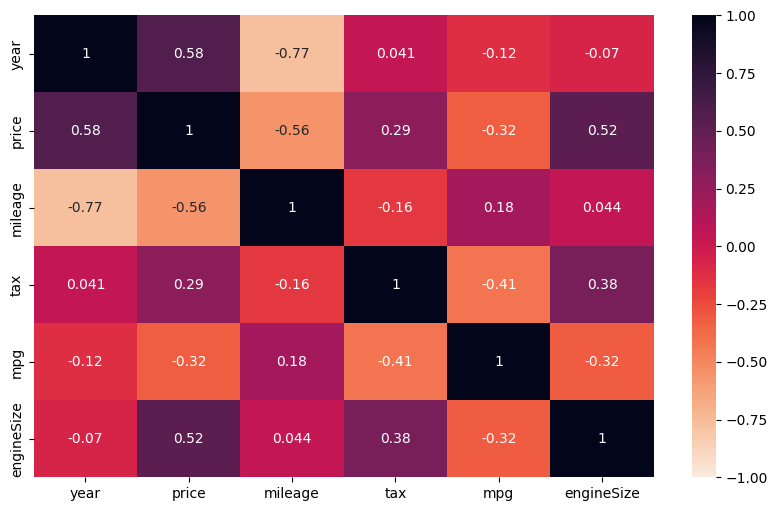

In [ ]:
# Avaliação a partir da Matriz de Correlação usando o pacote Seaborn
plt.figure(figsize = (10,6))
sbr.heatmap(dfCars.corr(numeric_only=True), annot=True, cmap='rocket_r', vmin=-1, vmax=1);

A matriz de correlação acima apresenta um resultado bastante realista da percepção humana:

- Correlação positiva com preço e ano
- Grande correlação positiva com preço do veículo e motorização

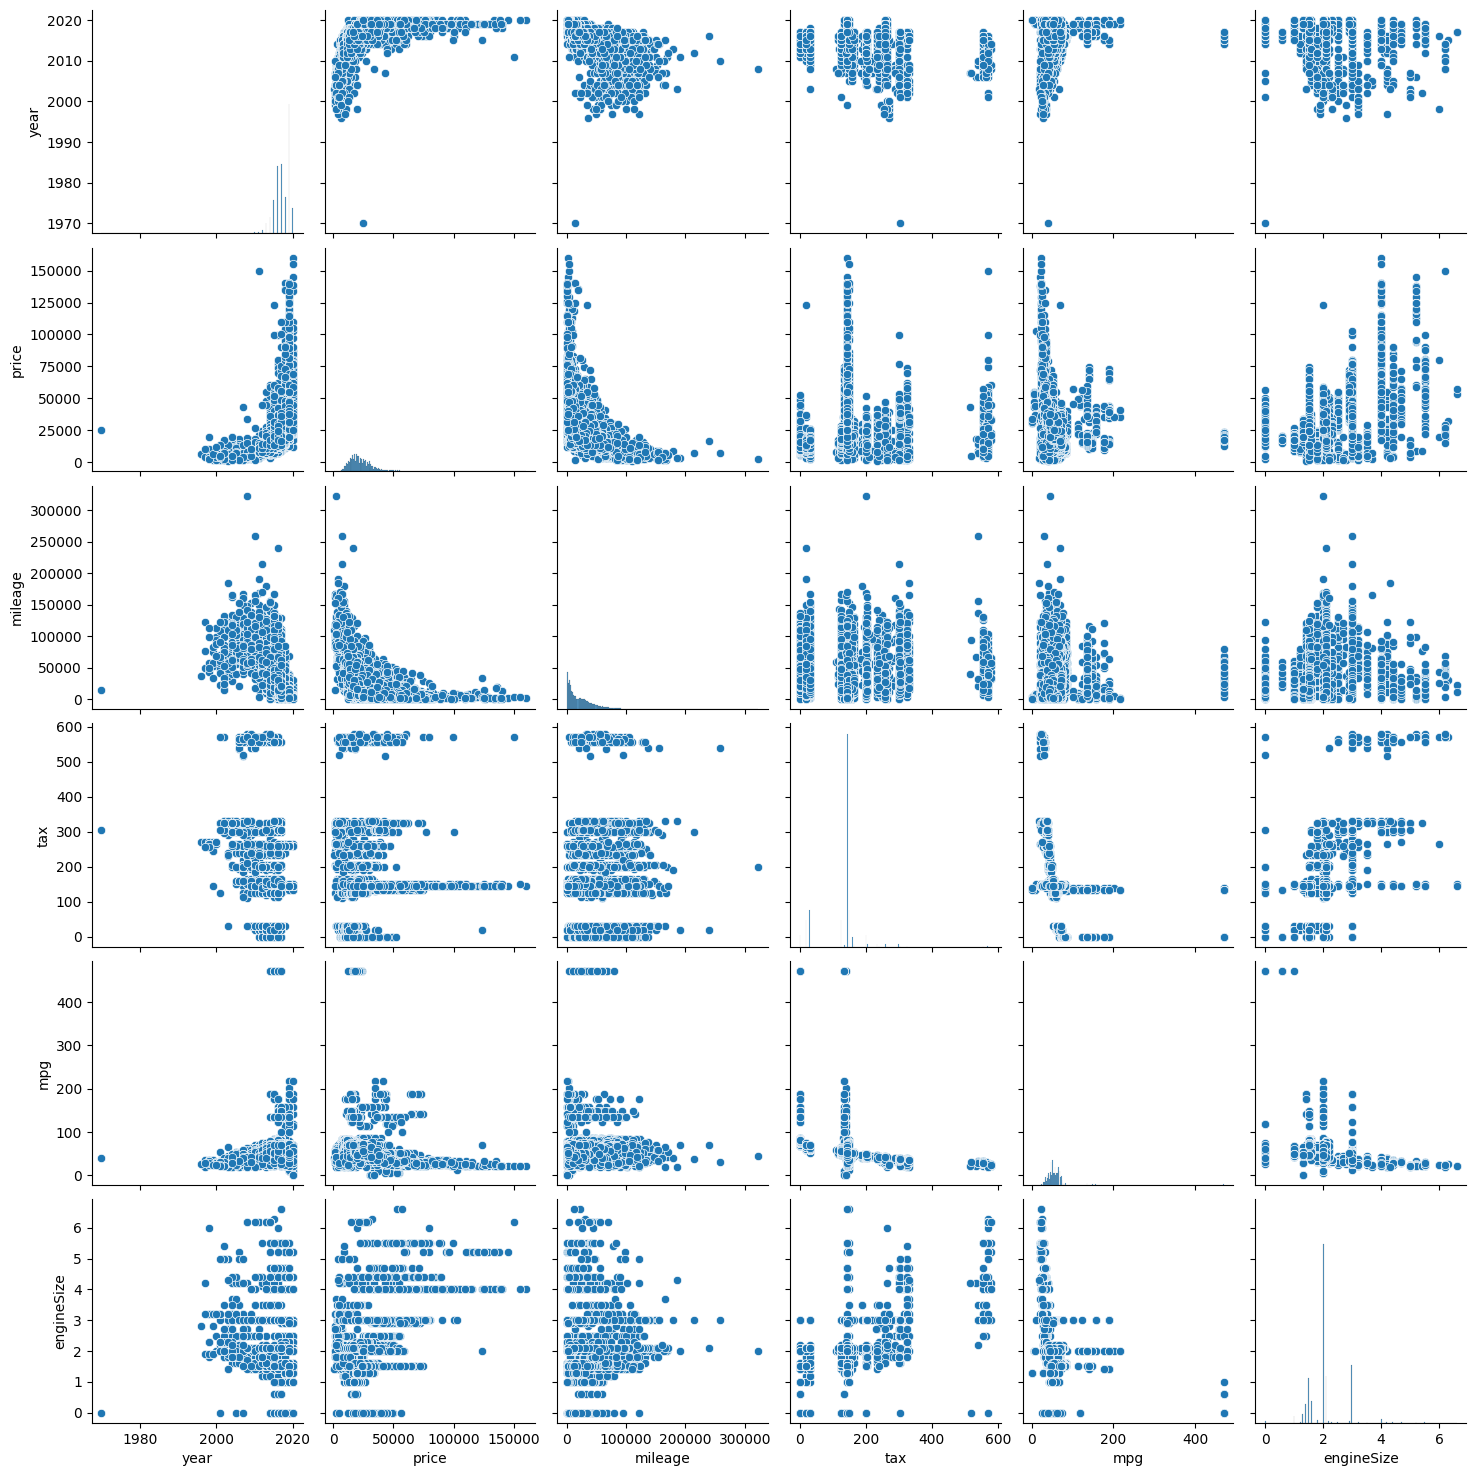

In [ ]:
sbr.pairplot(dfCars)
plt.show()

# 5. Pré-processamento de Dados

### 5.1 Tratamento de missings e limpeza


In [ ]:
# Verificando os atributos que possuem nulos
dfCars.isnull().sum()


manufacturer    0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
manuf_model     0
dtype: int64

Esse dataset do Kaggle já foi tratado na fonte, e o resultado valida a informação descrita no site.


<Axes: >

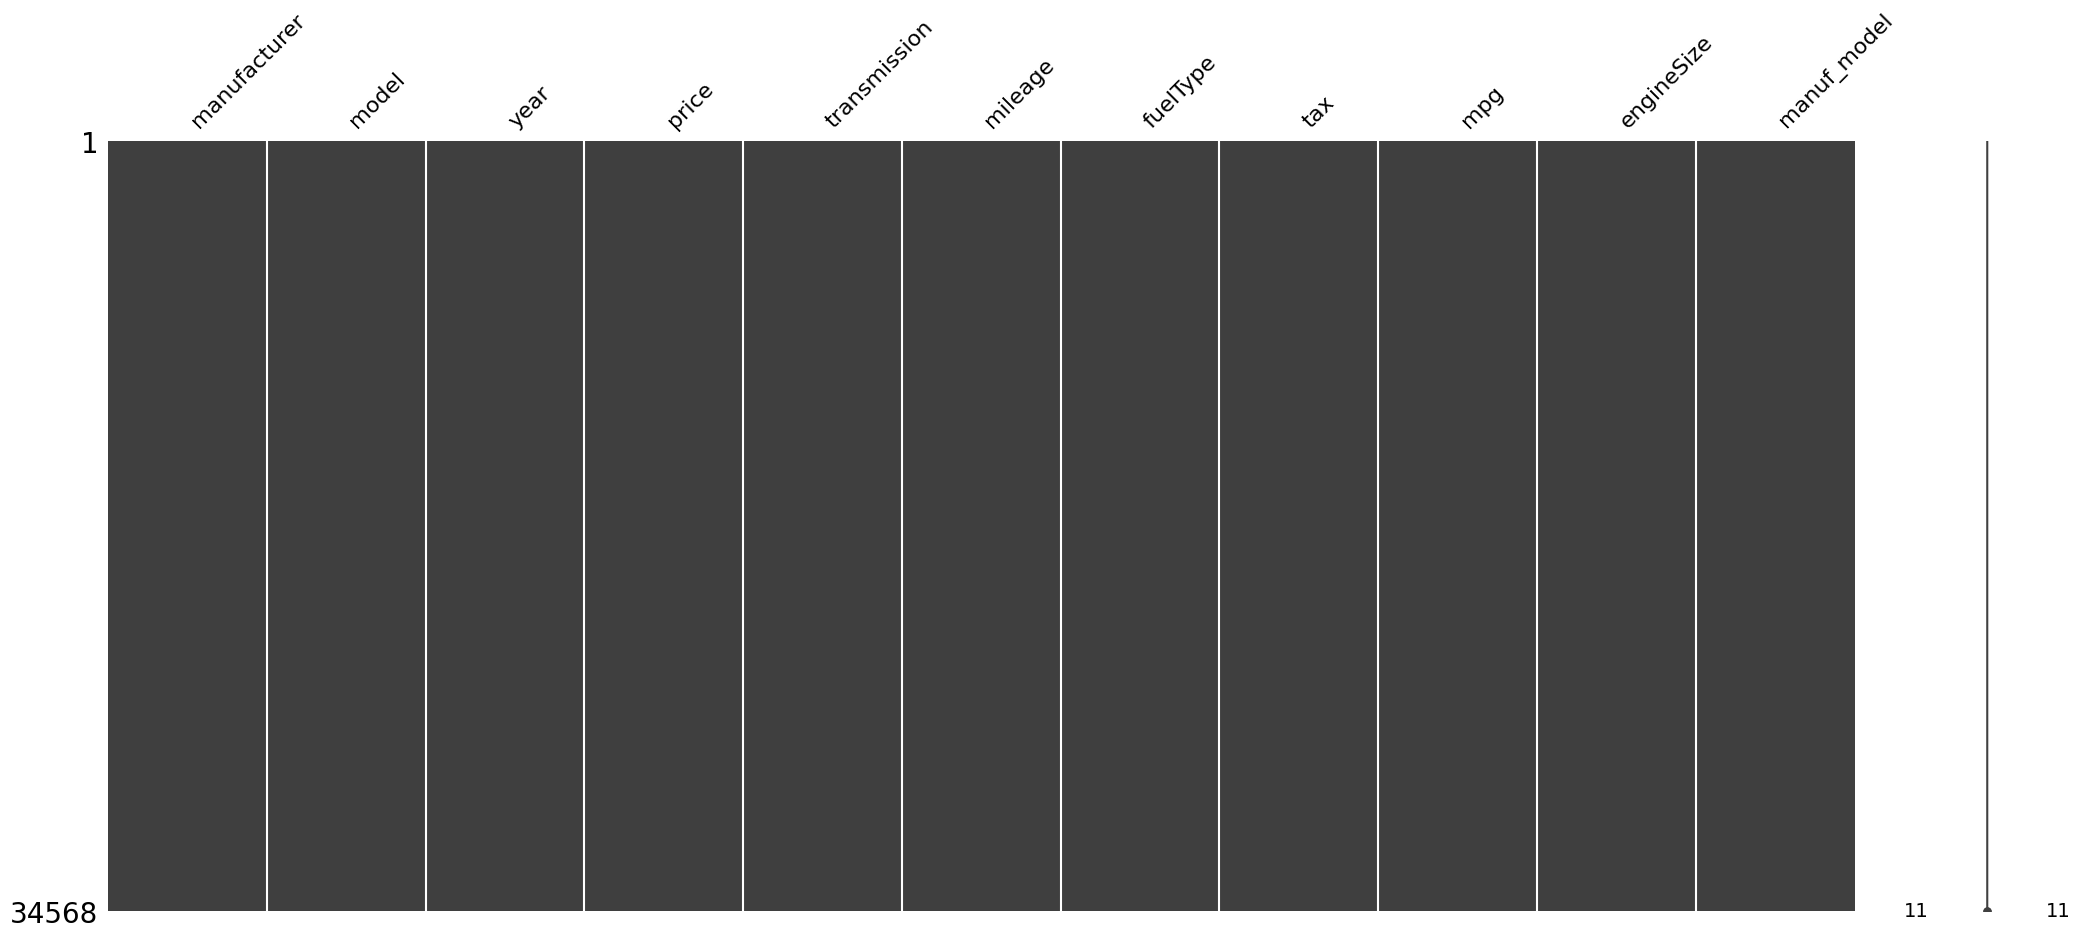

In [ ]:
# Exibindo a matriz de nulidade do dataframe
ms.matrix(dfCars)


Esse dataset utilizado e como pode ser comprovado no link do kaggle, foi previamente trabalhado e ajustado. Comprovamos aqui pela matriz que não registros nulos.


### **5.2** Redução de dimensionalidade
Para esse estudo, busco encontrar correlação entre a compra de um carro baseada na marca/modelo, tipo de transmissão, tipo de combustível, motorização e consumo. Dessa forma, vou redimensionar o dataset apenas com os atributos que considero a princípio relevantes.

In [ ]:
print(dfCars)

      manufacturer       model  year  price transmission  mileage fuelType  \
0             Audi          A1  2017  12500       Manual    15735   Petrol   
1             Audi          A6  2016  16500    Automatic    36203   Diesel   
2             Audi          A1  2016  11000       Manual    29946   Petrol   
3             Audi          A4  2017  16800    Automatic    25952   Diesel   
4             Audi          A3  2019  17300       Manual     1998   Petrol   
...            ...         ...   ...    ...          ...      ...      ...   
34563     Mercedes     C Class  2020  35999    Automatic      500   Diesel   
34564     Mercedes     B Class  2020  24699    Automatic     2500   Diesel   
34565     Mercedes   GLC Class  2019  30999    Automatic    11612   Diesel   
34566     Mercedes   CLS Class  2019  37990    Automatic     2426   Diesel   
34567     Mercedes     S Class  2019  54999    Automatic     2075   Diesel   

       tax   mpg  engineSize         manuf_model  
0      150  

In [ ]:
# Novo dataset mais enxuto para proceder com as transformações categóricas
dfCarsNew = dfCars.loc[:, ['model', 'year', 'price', 'transmission', 'fuelType', 'mpg', 'engineSize', 'manuf_model' ]]
print(dfCarsNew)

            model  year  price transmission fuelType   mpg  engineSize  \
0              A1  2017  12500       Manual   Petrol  55.4         1.4   
1              A6  2016  16500    Automatic   Diesel  64.2         2.0   
2              A1  2016  11000       Manual   Petrol  55.4         1.4   
3              A4  2017  16800    Automatic   Diesel  67.3         2.0   
4              A3  2019  17300       Manual   Petrol  49.6         1.0   
...           ...   ...    ...          ...      ...   ...         ...   
34563     C Class  2020  35999    Automatic   Diesel  55.4         2.0   
34564     B Class  2020  24699    Automatic   Diesel  55.4         2.0   
34565   GLC Class  2019  30999    Automatic   Diesel  41.5         2.1   
34566   CLS Class  2019  37990    Automatic   Diesel  45.6         2.0   
34567     S Class  2019  54999    Automatic   Diesel  52.3         2.9   

              manuf_model  
0                 Audi A1  
1                 Audi A6  
2                 Audi A1  

In [ ]:
# Visualizando a variação dos dados no novo dataset
dfCarsNew.describe()

,year,price,mpg,engineSize
count,34568.000000,34568.000000,34568.000000,34568.000000
mean,2017.168132,23529.611490,54.190063,2.058086
std,2.249212,11706.977313,21.245980,0.583447
min,1970.000000,650.000000,1.100000,0.000000
25%,2016.000000,15990.000000,44.100000,1.600000
50%,2017.000000,21000.000000,52.300000,2.000000
75%,2019.000000,28298.000000,62.800000,2.100000
max,2020.000000,159999.000000,470.800000,6.600000


Como já identificado em passos anteriores, causa estranheza o engineSize ter valores abaixo de 1.0, considerando inclusive as 3 marcas escolhidas no dataset. Por esse motivo e para não afetar esse estudo, eliminarei os registros com engineSize < 1.0.

In [ ]:
# Filtrando o dataset para manter somente os veículos com motorização
# maior ou igual a 1.0
fdimension = dfCarsNew['engineSize'] >= 1

# Criando um novo dataset com o filtro aplicado e mantendo o anterior
# reduzido para futura comparação
dfCarsNewf = dfCarsNew[fdimension]

# Criando uma lista dos modelos que só possuem 1 registro de venda
# para excluir do dataset
dfFiltroModeloAgrupado = dfCarsNewf.loc[:, ['manuf_model']]
dfFiltroModeloAgrupado['Contagem'] =  dfFiltroModeloAgrupado.groupby(
    'manuf_model')['manuf_model'].transform('count')
dfCarsUniq = dfFiltroModeloAgrupado[(
    dfFiltroModeloAgrupado['Contagem']==1)][['manuf_model', 'Contagem']]
# Cria a lista que servirá de filtro para exclusão das linhas
lscar = dfCarsUniq['manuf_model'].values.tolist()
dfCarsNewf = dfCarsNewf[~dfCarsNewf.manuf_model.isin(lscar)]

dfCarsNewf.describe()

,year,price,mpg,engineSize
count,34439.000000,34439.000000,34439.000000,34439.000000
mean,2017.169314,23529.046430,53.679959,2.065321
std,2.231569,11713.688066,15.336334,0.571637
min,1996.000000,650.000000,1.100000,1.000000
25%,2016.000000,15990.000000,44.100000,1.600000
50%,2017.000000,21000.000000,52.300000,2.000000
75%,2019.000000,28290.000000,62.800000,2.100000
max,2020.000000,159999.000000,217.300000,6.600000


Percebe-se agora que não temos mais motorização inferior a 1. Se compararmos o dataset com os registros originais (34568) e o dataset filtrado (34439), podemos supor que os valores foram digitados errados ou no tratamento feito pelo autor tinham algum propósito.

### 5.3 Separação de Conjuntos de Treino e Teste

In [ ]:
# Separando o dataset em conjunto de treino e teste em 80/20 (treino/teste)

X = dfCarsNewf.drop('manuf_model', axis=1)
y = dfCarsNewf.manuf_model


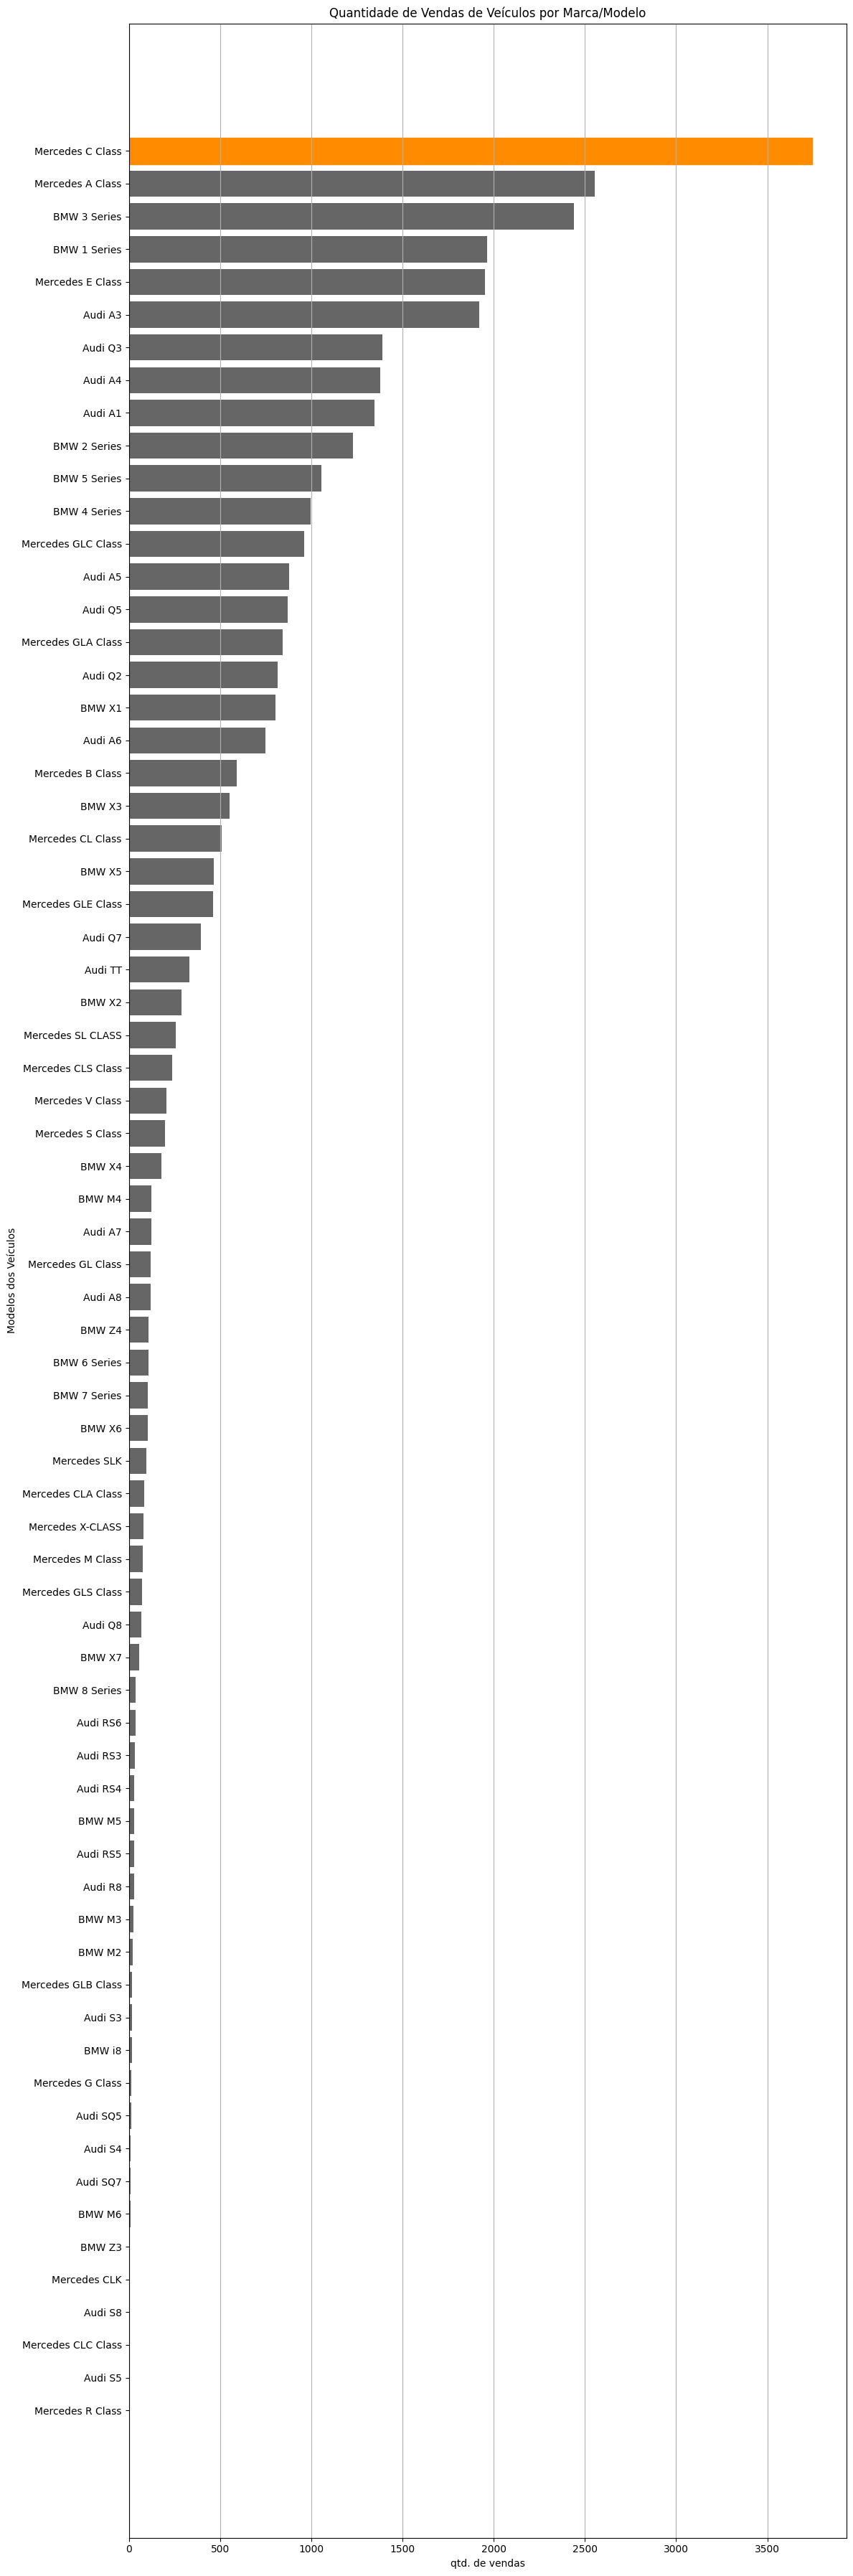

In [ ]:
# Contar o número de vendas por marca/modelo"
count_models = y.value_counts()

# Prepara a figura (fig) e a área do gráfico (ax)
fig, ax = plt.subplots(figsize = (12, 36))

# Habilita a grade na área do gráfico e aplica ordem 0 para posicionar
# a grade por trás das barras
ax.grid(visible=True, zorder=0, axis='x')

# Plota o gráfico de barras e limita o texto do eixo Y a 60 caracteres
barras = ax.barh(y = count_models.index
, width = count_models.values, color = '#666666')

# Inverte o eixo Y
ax.invert_yaxis()

# Acrescenta um título ao gráfico
plt.title('Quantidade de Vendas de Veículos por Marca/Modelo')

# Define o rótulo do eixo Y
plt.ylabel('Modelos dos Veículos')

# Define o rótulo do eixo X
plt.xlabel('qtd. de vendas')

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Considerando a ordenação por valor, será dado destaque a maior barra
# no gráfico
barras[0].set_color('#FF8C00')

# Exibe o gráfico
plt.show()

In [ ]:
y.value_counts()

Mercedes C Class      3747
Mercedes A Class      2555
BMW 3 Series          2439
BMW 1 Series          1964
Mercedes E Class      1952
                      ... 
Mercedes CLK             7
Audi S8                  4
Mercedes CLC Class       3
Audi S5                  3
Mercedes R Class         2
Name: manuf_model, Length: 70, dtype: int64

In [ ]:
# Fazendo a divisão do conjunto
# Com base no resultado gráfico acima, podemos perceber o quanto o dataset de
# teste está desbalanceado. Com base nisso, faremos o holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Parâmetros e partições da validação cruzada
num_k = 5
kfold = KFold(n_splits=num_k, shuffle=True, random_state=8)


In [ ]:
# Proporção da base de treino
(y_train.value_counts()/y_train.shape[0])*100

Mercedes C Class      10.880657
Mercedes A Class       7.416933
BMW 3 Series           7.080931
BMW 1 Series           5.703738
Mercedes E Class       5.666404
                        ...    
BMW Z3                 0.020741
Audi S8                0.012445
Mercedes CLC Class     0.008296
Audi S5                0.008296
Mercedes R Class       0.004148
Name: manuf_model, Length: 70, dtype: float64

In [ ]:
(y_test.value_counts()/y_test.shape[0])*100

Mercedes C Class      10.878823
Mercedes A Class       7.423539
BMW 3 Series           7.084785
BMW 1 Series           5.700736
Mercedes E Class       5.671700
                        ...    
Mercedes CLK           0.019357
Mercedes CLC Class     0.009679
Mercedes R Class       0.009679
Audi S5                0.009679
Audi S8                0.009679
Name: manuf_model, Length: 70, dtype: float64

In [ ]:
dfCarsNewf.describe()

,year,price,mpg,engineSize
count,34439.000000,34439.000000,34439.000000,34439.000000
mean,2017.169314,23529.046430,53.679959,2.065321
std,2.231569,11713.688066,15.336334,0.571637
min,1996.000000,650.000000,1.100000,1.000000
25%,2016.000000,15990.000000,44.100000,1.600000
50%,2017.000000,21000.000000,52.300000,2.000000
75%,2019.000000,28290.000000,62.800000,2.100000
max,2020.000000,159999.000000,217.300000,6.600000


A variação do preço mínimo e do preço máximo é muito grande, a sim como o consumo. A fim de reduzir a influência de valores extremos ou para tornar a distribuição dos dados mais aproximada da normalidade, vou aplicar a transformação logarítmica nas colunas [price] e [mpg]

In [ ]:
dfCarsNewf

,model,year,price,transmission,fuelType,mpg,engineSize,manuf_model
0,A1,2017,12500,Manual,Petrol,55.4,1.4,Audi A1
1,A6,2016,16500,Automatic,Diesel,64.2,2.0,Audi A6
2,A1,2016,11000,Manual,Petrol,55.4,1.4,Audi A1
3,A4,2017,16800,Automatic,Diesel,67.3,2.0,Audi A4
4,A3,2019,17300,Manual,Petrol,49.6,1.0,Audi A3
...,...,...,...,...,...,...,...,...
34563,C Class,2020,35999,Automatic,Diesel,55.4,2.0,Mercedes C Class
34564,B Class,2020,24699,Automatic,Diesel,55.4,2.0,Mercedes B Class
34565,GLC Class,2019,30999,Automatic,Diesel,41.5,2.1,Mercedes GLC Class
34566,CLS Class,2019,37990,Automatic,Diesel,45.6,2.0,Mercedes CLS Class


In [ ]:
# Aplicando a transformação logarítmica no atributo [price] e [mpg]
dfCarsNewf['price'] = np.log1p(dfCarsNewf['price'])

dfCarsNewf['mpg'] = np.log1p(dfCarsNewf['mpg'])

In [ ]:
dfCarsNewf.describe()

,year,price,mpg,engineSize
count,34439.000000,34439.000000,34439.000000,34439.000000
mean,2017.169314,9.959760,3.967003,2.065321
std,2.231569,0.464171,0.262224,0.571637
min,1996.000000,6.478510,0.741937,1.000000
25%,2016.000000,9.679781,3.808882,1.600000
50%,2017.000000,9.952325,3.975936,2.000000
75%,2019.000000,10.250299,4.155753,2.100000
max,2020.000000,11.982929,5.385870,6.600000


### **5.4** Transformações Categóricas

In [ ]:
# Fazendo uma descrição dos itens categóricos
dfCarsNewf.select_dtypes(include='object').describe()

,model,transmission,fuelType,manuf_model
count,34439,34439,34439,34439
unique,70,4,4,70
top,C Class,Semi-Auto,Diesel,Mercedes C Class
freq,3747,15105,21753,3747


Vendo a descrição dos atributos categóricos, percebo que a distribuição de valores no modelo do veículo é bastante grande e para melhorar a performance e evitar falhas no modelo preditivo, aplicarei técnicas diferentes de encoding.


#### 5.4.1 Label Encoding
Por conta do grande número de modelos de veículos, primeiramente aplicarei o label encoding para substituir os valores categóricos em numerais, para só então aplicar o one-hot encoding.


In [ ]:
# Aplica o label encoder na coluna model e manuf_model que é a que possui muitos distintos
lb_enc = LabelEncoder()

dfCarsNewf.model = lb_enc.fit_transform(dfCarsNewf.model)
dfCarsNewf.manuf_model = lb_enc.fit_transform(dfCarsNewf.manuf_model)


In [ ]:
dfCarsNewf

,model,year,price,transmission,fuelType,mpg,engineSize,manuf_model
0,9,2017,9.433564,Manual,Petrol,4.032469,1.4,0
1,13,2016,9.711176,Automatic,Diesel,4.177459,2.0,4
2,9,2016,9.305741,Manual,Petrol,4.032469,1.4,0
3,11,2017,9.729194,Automatic,Diesel,4.223910,2.0,2
4,10,2019,9.758520,Manual,Petrol,3.923952,1.0,1
...,...,...,...,...,...,...,...,...
34563,17,2020,10.491274,Automatic,Diesel,4.032469,2.0,49
34564,16,2020,10.114559,Automatic,Diesel,4.032469,2.0,48
34565,28,2019,10.341742,Automatic,Diesel,3.749504,2.1,60
34566,22,2019,10.545105,Automatic,Diesel,3.841601,2.0,54


#### 5.4.2 One-hot Encoding

In [ ]:
lista = list(X.select_dtypes(include=['object']).columns)
print(lista)

['model', 'transmission', 'fuelType']


In [ ]:
# Selecionando as colunas que será aplicado o one-hot encoding
cl_to_encode = lista

# Cria dataset com os atributos que não serão codificados
cars_encoded_X_train = X_train.drop(cl_to_encode, axis=1)
cars_encoded_X_train = cars_encoded_X_train.reset_index()

cars_encoded_X_test = X_test.drop(cl_to_encode, axis=1)
cars_encoded_X_test = cars_encoded_X_test.reset_index()

# Inicializando o OneHotEncoder
on_ht = OneHotEncoder(sparse_output=False)

# Codificar as colunas categóricas do conjunto de treino
encoded_columns_X_train = on_ht.fit_transform(X_train[cl_to_encode])

# Obter os nomes das novas colunas codificadas
encoded_columns_transf = on_ht.get_feature_names_out(cl_to_encode)

# Cria dataframe com valores e nomes de atributos
X_train_encoded = pd.DataFrame(encoded_columns_X_train,
                               columns=encoded_columns_transf)

# Recria o dataframe de treino com as colunas transformadas
X_train = pd.concat([cars_encoded_X_train, X_train_encoded], axis=1, join='outer')


In [ ]:
# Transformando as colunas de testes
encoded_columns_X_test = on_ht.transform(X_test[cl_to_encode])

# Cria dataframe com valores e nomes de atributos
X_test_encoded = pd.DataFrame(encoded_columns_X_test,
                               columns=encoded_columns_transf)

# Recria o dataframe de treino com as colunas transformadas
X_test = pd.concat([cars_encoded_X_test, X_test_encoded], axis=1, join='outer')

#### 5.4.3 Seleção de Atributos

In [ ]:
# Considerando que o SelectKBest não trabalha com atributos categóricos
# farei o label encode em todos os atributos dessa natureza para executar

# Copia do dataset principal
dfCarsNewf2 = dfCarsNewf

# Converte os atributos [transmission] e [fuelType]
dfCarsNewf2.transmission = lb_enc.fit_transform(dfCarsNewf2.transmission)
dfCarsNewf2.fuelType = lb_enc.fit_transform(dfCarsNewf2.fuelType)

X2 = dfCarsNewf2.drop('manuf_model', axis=1)
y2 = dfCarsNewf2.manuf_model

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X2, y2)

# Reduz X para os atributos selecionados
features = fit.transform(X2)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dfCarsNewf2.columns[0:7])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dfCarsNewf2.columns[0:7]))


Número original de atributos: 7

Número reduzido de atributos: 4

Atributos Originais: Index(['model', 'year', 'price', 'transmission', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

Scores dos Atributos Originais: [    inf  63.262 266.554  19.956 114.759 171.649 492.188]

Atributos Selecionados: ['model' 'price' 'mpg' 'engineSize']


#### 5.4.4 Eliminação de Atributos Recursiva

In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=100)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X2, y2)

# Print dos resultados
print("Atributos Originais:", dfCarsNewf2.columns[0:7])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(
    input_features=dfCarsNewf2.columns[0:7]))

Atributos Originais: Index(['model', 'year', 'price', 'transmission', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

Atributos Selecionados: [ True  True False False  True False  True]

Ranking de atributos: [1 1 2 3 1 4 1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['model' 'year' 'fuelType' 'engineSize']


#### 5.4.5 Atributos com ExtraTrees
O ExtraTrees Classifier é uma abordagem de aprendizado de máquina baseada em árvore que usa a randomização para reduzir a variância e o custo computacional (em comparação com a Random Forest). A avaliação é feita pela importância atribuida a cada atributo, indicando a maior importância para a maior nota.


In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X2,y2)

# Exibe os atributos orginais
print("\nAtributos Originais:", dfCarsNewf2.columns[0:7])

# Exibe a pontuação de importância para cada atributo
print(modelo.feature_importances_)


Atributos Originais: Index(['model', 'year', 'price', 'transmission', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')
[0.635 0.034 0.06  0.019 0.016 0.128 0.107]


SelectBest - Atributos Selecionados: ['model' 'price' 'mpg' 'engineSize']

Regressão - Atributos Selecionados: ['model' 'year' 'fuelType' 'engineSize']

ExtraTrees - Atributos Melhores Pontuados: ['model' 'year' 'fuelType' 'engineSize']

Utilizando as técnicas diferentes para seleção dos atributos, percebeu-se uma variação de 50% entre o SelectBest e os demais.

# 6. Modelagem e inferência

## 6.1 Modelagem

In [ ]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


KNN: 0.271871 (0.007529)
CART: 0.999585 (0.000347)
NB: 0.982121 (0.001942)
SVM: 0.282076 (0.007304)


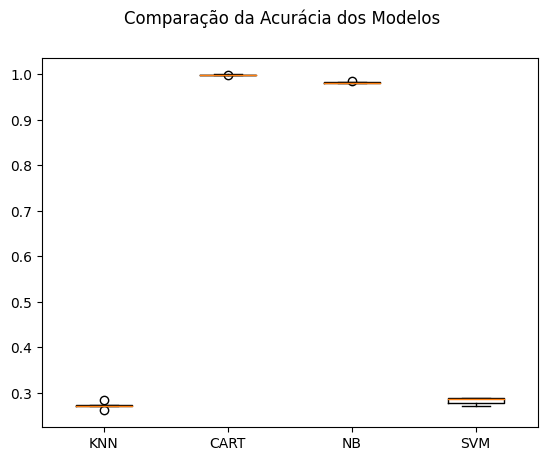

In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Em testes anteriores sem os atributos [model] e [mpg], o melhor resultado de acurácia não chegou a 50% e foi sobre o modelo de árvore de decisão. Após a inclusão desses atributos no conjunto de análise, a acurácia subiu para quase 100% nos modelos DecisionTreeClassifier e GuassianNB.

Será preciso apurar melhor esse resultado e executar novos testes para validar se não houve overfiting.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9999032133178475


In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9825783972125436


## 6.2 Criação e Avaliação de Modelos

### 6.2.1 Linhas Base

LR: 0.272244 (0.006690)
KNN: 0.271871 (0.007529)
CART: 0.999585 (0.000347)
NB: 0.982121 (0.001942)
SVM: 0.282076 (0.007304)
Bagging: 0.999876 (0.000249)
RF: 0.999751 (0.000242)
ET: 0.999627 (0.000332)
Ada: 0.292363 (0.008171)
GB: 0.999876 (0.000249)
Voting: 0.329614 (0.010290)


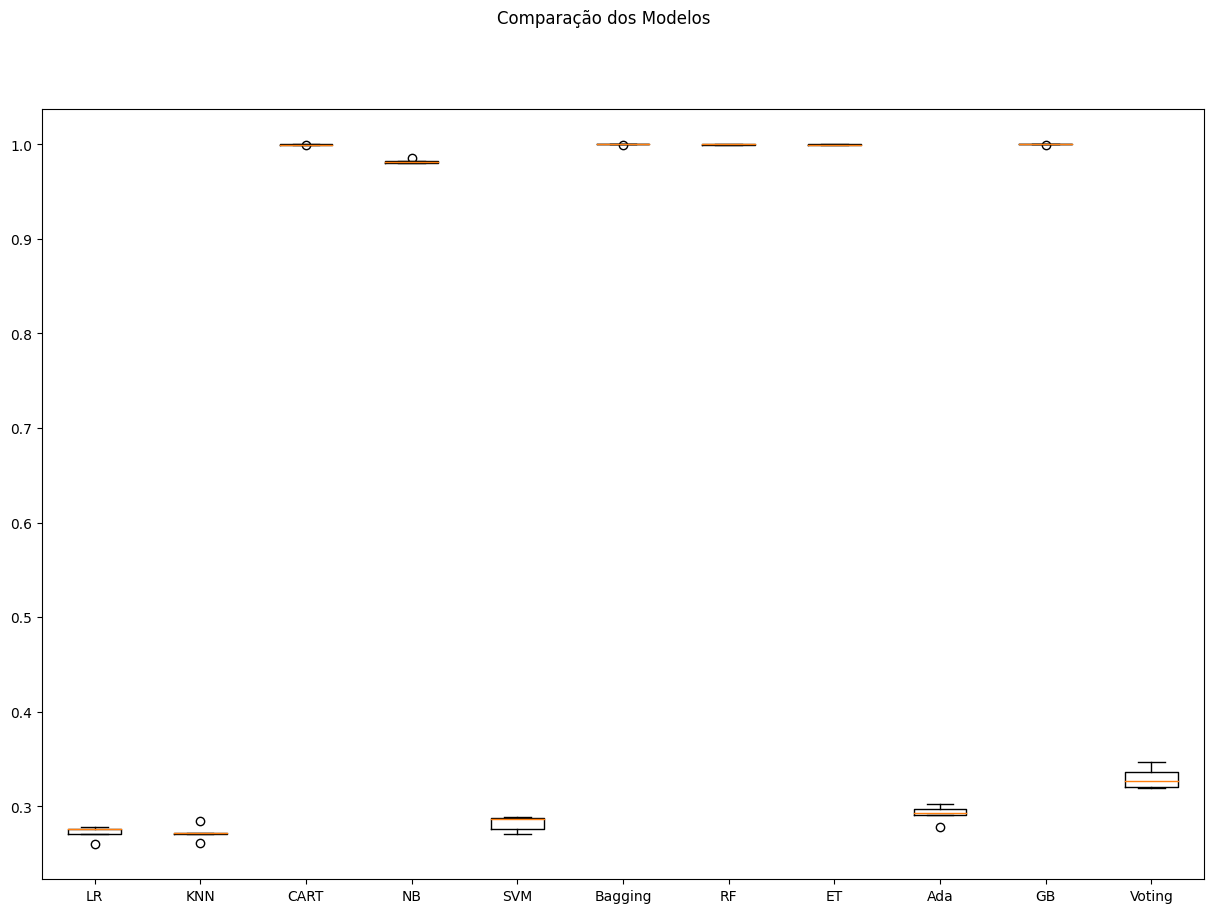

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(
    base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(
    n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(
    n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(
    n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(
    n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 6.2.2 Dados Padronizados e Normalizados

LR-orig: 0.272 (0.007)
KNN-orig: 0.272 (0.008)
CART-orig: 1.000 (0.000)
NB-orig: 0.982 (0.002)
SVM-orig: 0.282 (0.007)
Bag-orig: 1.000 (0.000)
RF-orig: 1.000 (0.000)
ET-orig: 1.000 (0.000)
Ada-orig: 0.292 (0.008)
GB-orig: 1.000 (0.000)
Vot-orig: 0.330 (0.010)
LR-padr: 1.000 (0.000)
KNN-padr: 0.999 (0.000)
CART-padr: 1.000 (0.000)
NB-padr: 1.000 (0.000)
SVM-padr: 1.000 (0.000)
Bag-padr: 1.000 (0.000)
RF-padr: 1.000 (0.000)
ET-padr: 1.000 (0.000)
Ada-padr: 0.292 (0.008)
GB-padr: 1.000 (0.000)
Vot-padr: 1.000 (0.000)
LR-norm: 1.000 (0.000)
KNN-norm: 0.998 (0.001)
CART-norm: 1.000 (0.000)
NB-norm: 1.000 (0.000)
SVM-norm: 1.000 (0.000)
Bag-norm: 1.000 (0.000)
RF-norm: 1.000 (0.000)
ET-norm: 1.000 (0.000)
Ada-norm: 0.292 (0.008)
GB-norm: 1.000 (0.000)
Vot-norm: 1.000 (0.000)


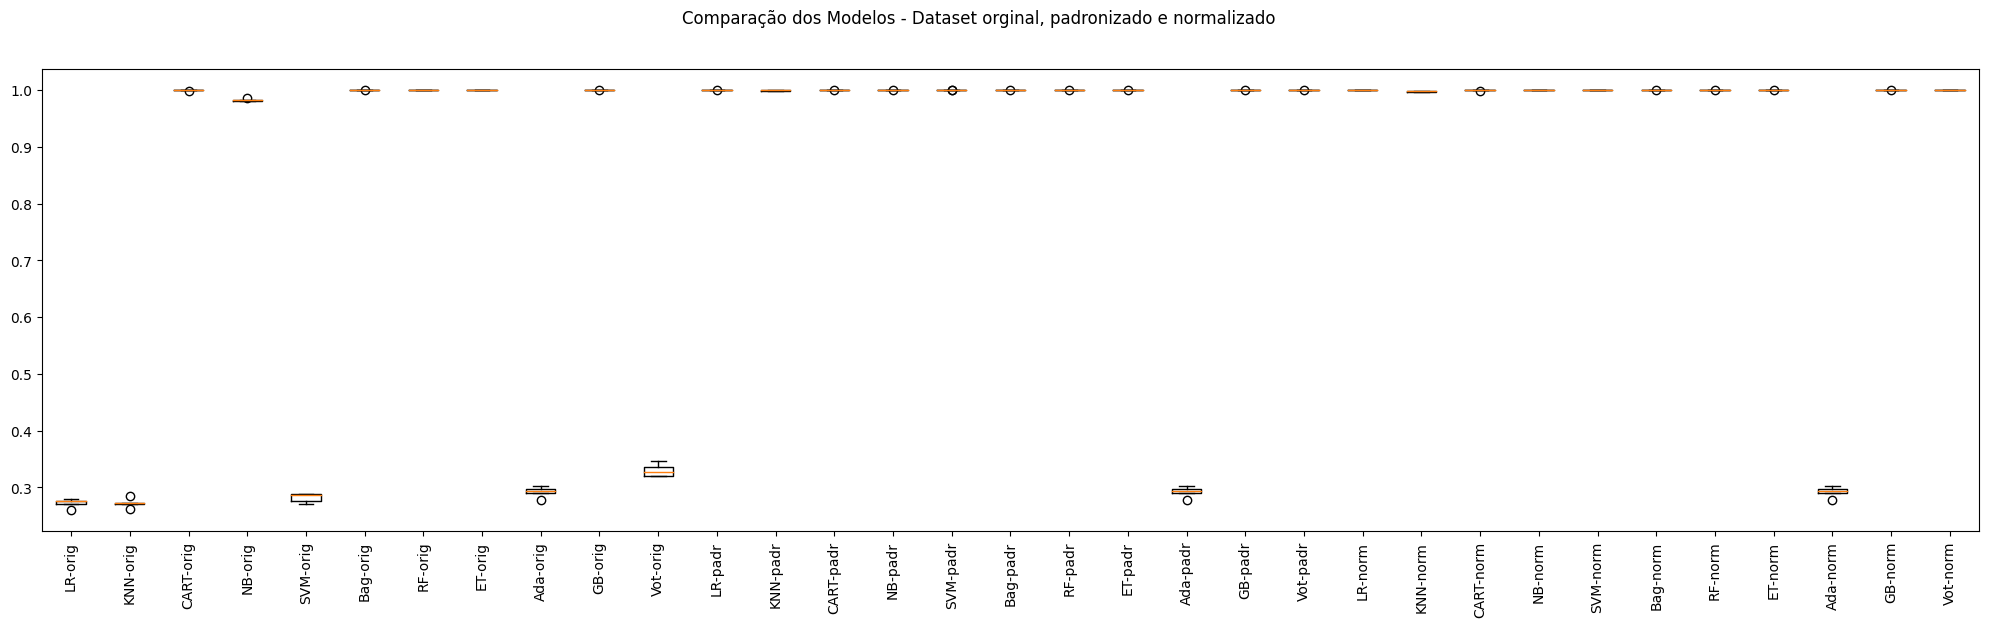

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para
# as diferentes versões aplicadas ao dataset
pipelines = []
results = []
names = []


# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(
    base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(
    n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(
    n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(
    n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle(
    'Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Os resultados obtidos despertaram atenção para o alto nível de acurácia e baixo ou nenhum desvio padrão após aplicado a normalização e padronização dos modelos.

Nitidamente modelos como KNN, LR, SVM e Vot sairam de uma acurácia entre 20 e 30% para 100%.

### 6.2.3 Otimização dos Hiperparâmetros

Dada a alta acurácia em vários modelos, vou testar a otimização no KNN que teve baixa porcentagem para veririficar a melhoria após o tunning.

In [66]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

lsrd = rd.sample(range(1,30,2), 11)

param_grid = {
    'KNN__n_neighbors': lsrd,
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Para o %s, a melhor acurácia foi %f usando %s" % (
        name, grid.best_score_, grid.best_params_))


Para o knn-orig, a melhor acurácia foi 0.303605 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 27}
Para o knn-padr, a melhor acurácia foi 0.999544 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Para o knn-norm, a melhor acurácia foi 0.998507 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}


## 6.3 Finalização do modelo

In [96]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = DecisionTreeClassifier(random_state=42)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))



0.9997096399535423


In [97]:
# As variáveis X2 e y2 são aplicadas para todo modelo
# Elas foram carregadas com os dados categóricos transformados por label encoder
scaler = StandardScaler().fit(X2) # ajuste do scaler com TODO o dataset
rescaledX2 = scaler.transform(X2) # aplicação da padronização com TODO o dataset
model.fit(rescaledX2, y2)


DecisionTreeClassifier(random_state=42)

### 6.4 Simulando a aplicação do modelo em dados não vistos


In [98]:
# Novos dados - não sabemos a classe!
data = {'model':  [1, 9, 5],
        'year': [2017, 2018, 2019],
        'price': [9.123456, 10.852467, 11.894315],
        'transmission': [1, 2, 3],
        'fuelType': [0, 2, 3],
        'mpg': [1.246780, 2.156794, 3.975164],
        'engineSize': [1.4, 2.0, 2.9]
        }

atributos = ['model', 'year', 'price', 'transmission', 'fuelType', 'mpg', 'engineSize']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:7].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ -1.053  -0.076  -1.802  -0.42   -0.754 -10.374  -1.164]
 [ -0.609   0.372   1.923   0.333   0.646  -6.903  -0.114]
 [ -0.831   0.82    4.168   1.086   1.346   0.031   1.46 ]]


In [99]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[25  0 29]


## 6.5 Matriz de Confusão
O modelo escolhido com base nos testes para gerar a matriz de confusão foi o DecisionTreeClassifier (CART)

In [103]:
# Criando o classificador e ajustando aos dados de treinamento
model.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = model.predict(X_test)

# Criando a matriz de confusão usando as previsões e os rótulo reais
confusion = confusion_matrix(y_test, y_pred)

print(confusion)

[[404   0   0 ...   0   0   0]
 [  0 577   0 ...   0   0   0]
 [  0   0 414 ...   0   0   0]
 ...
 [  0   0   0 ...  29   0   0]
 [  0   0   0 ...   0  62   0]
 [  0   0   0 ...   0   0  25]]


In [105]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)


Classification Report:
                     precision    recall  f1-score   support

           Audi A1       1.00      1.00      1.00       404
           Audi A3       1.00      1.00      1.00       577
           Audi A4       1.00      1.00      1.00       414
           Audi A5       1.00      1.00      1.00       264
           Audi A6       1.00      1.00      1.00       224
           Audi A7       1.00      1.00      1.00        37
           Audi A8       1.00      1.00      1.00        35
           Audi Q2       1.00      1.00      1.00       245
           Audi Q3       1.00      1.00      1.00       417
           Audi Q5       1.00      1.00      1.00       262
           Audi Q7       1.00      1.00      1.00       119
           Audi Q8       1.00      1.00      1.00        21
           Audi R8       1.00      1.00      1.00         8
          Audi RS3       1.00      1.00      1.00        10
          Audi RS4       1.00      1.00      1.00         9
          Audi 

Os dados obtidos a partir do relatório de classificação demostraram que existe um acerto na predição em quase sua totalidade. O campo **'precision'** é a proporção de verdadeiros positivos em relação a todos os exemplos classificados como positivos.

**recall** é a proporção de verdadeiros positivos em relação a todos os exemplos verdadeiramente positivos. Representa a capacidade do modelo identificar corretamente todas as amostras positivas.

**f1-score** é a média harmônica da precisão e recall.

**support** é o número de ocorrências de cada classe no conjunto de teste

**accuracy** é a proporção de todas as previsões corretas

**macro avg** é a média não ponderada das métricas para cada classe

**weighted avg** é a média ponderada das métricas para cada classe, onde a ponderação é baseada no suporte de cada classe

# 7. Conclusão

Nos diversos testes trabalhados sobre o dataset, percebeu-se que a variação nos atributos afetaram de forma extrema os resultados aplicados aos modelos. Quando foram retirados alguns parâmetros no início desse estudo pela ótica de percepção humana em achar desnecessários, os modelos testados não chegavam em acurácia de 50%. Diante disso, as etapas de eliminação de atributos foram melhores trabalhadas e refeitas na tentativa de melhorar o resultado.

Em datasets com muitos dados categóricos e variações extremas nos dados necessitam de muito trabalho e a aplicação de várias técnicas de normalização e padronização para estarem aptas aos modelos preditivos.

Desde a primeira interação, o modelo que melhor apresentou resultado foi o de árvores de decisão.

Com base nos testes finais e no relatório de classificação, acredito que modelo esteja apto a prever a marca/modelo do veículo conforme desejado no início do projeto.

Tenho absoluta certeza que cabem melhorias nesse projeto, inclusive com mais métricas para medir e apresentar a eficiência do modelo.


